# Description:
To be done

### Imports

In [24]:
#import argparse
#from array import array
import glob
import math
import numpy as np
import os
import ROOT
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1F, TH2F, TH3F, TH1, TLine
#from ROOT import gROOT, gBenchmark, gRandom, gSystem, Double, gStyle
import time

### Argument parser

In [25]:
'''
# ============================================================
# ArgumentParser
# ============================================================
parser = argparse.ArgumentParser(description='Cosmic Tracks')
parser.add_argument("config_file")
parser.add_argument("data_file",        nargs="+")
parser.add_argument("-o", "--out_path")
parser.add_argument("-i", "--uid",      type=int,            default=0,              help="Unique identifier used in output files.")
parser.add_argument("-n", "--max_evts", type=int,            default=0, metavar="N", help="Stop after %(metavar)s events.")
parser.add_argument("-n",               type=int,            default=0, metavar="N", help="Stop after %(metavar)s spills.")
parser.add_argument("-s", "--seed",     type=int,                                    help="Set the RNG seed.")
parser.add_argument("-m", "--measure",  action="store_true",                         help="Measure rho, phi and doca for each gamma and fill into histogram.")
parser.add_argument("-a", "--analyse",  action="store_true",                         help="Run analysis.")
parser.add_argument("-d", "--display",  action="store_true",                         help="Save event display CSVs.")
parser.add_argument("-D", "--debug",    action="store_true",                         help="Only one event per spill, fixed vertex position.")
args = parser.parse_args(argv)
'''
print('Done.')

Done.


### Set paths

In [26]:
# ============================================================
# Set paths
# ============================================================
datapath = '/data/SingleModule_Nov2020/LArPix/dataRuns/rootTrees/combined_with_light'
print(' datapath:   ', datapath)

outputpath = '/home/lhep/PACMAN/larpix-analysis/lightCharge_anticorrelation'
print(' outputpath: ', outputpath)

files = sorted([os.path.basename(path) for path in glob.glob(datapath+'/*.root')])
print(' datafiles (', len(files), '): ')
for f in files:
    print('              ', f)

 datapath:    /data/SingleModule_Nov2020/LArPix/dataRuns/rootTrees/combined_with_light
 outputpath:  /home/lhep/PACMAN/larpix-analysis/lightCharge_anticorrelation
 datafiles ( 22 ): 
               sync_wLightReco_20201129_122204.root
               sync_wLightReco_20201129_122655.root
               sync_wLightReco_20201129_130449.root
               sync_wLightReco_20201129_134857.root
               sync_wLightReco_20201129_143427.root
               sync_wLightReco_20201129_150749.root
               sync_wLightReco_20201129_155227.root
               sync_wLightReco_20201129_162434.root
               sync_wLightReco_20201129_170918.root
               sync_wLightReco_20201129_174140.root
               sync_wLightReco_20201129_182214.root
               sync_wLightReco_20201129_185437.root
               sync_wLightReco_20201129_193550.root
               sync_wLightReco_20201129_200721.root
               sync_wLightReco_20201129_204607.root
               sync_wLightReco_202011

### Define voxelisation

In [27]:
# ============================================================
# Define voxelisation
# ============================================================
n_pixels_x = 70
n_pixels_y = 70
n_pixels_z = 70
pitch_x = 4.434
pitch_y = 4.434
pitch_z = 4.434
pixels_x_min = - pitch_x * n_pixels_x/2. #155.19
pixels_x_max =   pitch_x * n_pixels_x/2. #155.19
pixels_y_min = - pitch_y * n_pixels_y/2. #155.19
pixels_y_max =   pitch_y * n_pixels_y/2. #155.19
pixels_z_min = 0
pixels_z_max = n_pixels_z*pitch_z*10 # factor 10 for correction... TODO: CHANGE THIS FOR NEXT PRODUCTION!!
#pixels_z_min = - pitch_z * n_pixels_z/2. #155.19
#pixels_z_max =   pitch_z * n_pixels_z/2. #155.19
#pixels_y_min = -155.19
#pixels_y_max = 155.19

### Loop over files

In [28]:
'''
# ============================================================
# Input tree
# ============================================================
#inputFileName = (str(args.data_file)[34:])[:-7]   # excludes ending .root

start = time.time()

# ROOT batch mode
ROOT.gROOT.SetBatch(1)

for file_number in range(len(files)):

    # Only process specific file(s)
    #if files[file_number] != 'datalog_2020_11_29_12_22_02_CET_evd.h5':
    #    continue

    #if not (file_number >= 0 and file_number < 10):
    #    continue

    inputFileName = files[file_number]

    print(' -------------------------------------- ')
    print(' Processing file', inputFileName)
    outFileName = inputFileName[:-7] + '.root'


    input_tree = ROOT.TChain("t_out", "t_out")
    #for root_file in config["data_files"]:
    #    input_tree.Add(root_file)
    #input_tree.Add( "/path/to.root" )
    input_tree.Add(datapath + '/' + inputFileName)

    #not_used_files = [13,32,50,61,66,77,81,86,89,92,94,97,99]
    #print " Do not use files with numbers in {:} " .format(not_used_files)


    # Define if plots are made or not (and make corresponding folders)
    make_plots = True
    if make_plots:
        plot_folder = inputFileName[16:-5]
        os.system('rm -rf plots/' + str(plot_folder))
        os.system('mkdir plots/' + str(plot_folder))

    # Turn on all branches of input tree
    input_tree.SetBranchStatus( "*", 1 )
'''
print('Done.')

Done.


### Make TChain with input files

In [29]:
# ROOT batch mode
# ROOT.gROOT.SetBatch(1)

#inputFileName = files[20]
inputFileName = 'sync_wLightReco_20201129_122204.root'
print(' Processing file', inputFileName)

input_tree = ROOT.TChain("t_out", "t_out")
#for root_file in config["data_files"]:
#    input_tree.Add(root_file)
#input_tree.Add( "/path/to.root" )
input_tree.Add(datapath + '/' + inputFileName)

# Turn on all branches of input tree
input_tree.SetBranchStatus("*",           1)
#input_tree.SetBranchStatus("l_integral",  1)
#input_tree.SetBranchStatus("l_amplitude", 1)
#input_tree.SetBranchStatus("l_time",      1)
#input_tree.SetBranchStatus("l_wfts",      1)
#input_tree.SetBranchStatus("l_tphotons",  1)

print('Done.')

 Processing file sync_wLightReco_20201129_122204.root
Done.


### Analyse TChain

In [30]:
'''
# Define Histograms / NTuples
# ---------------------------------------------------------
makePlots = True
h1_trLength          = TH1F('h1_trLength'         ,' ; Track length [mm] ; Entries [-]',                      150, 0, 500)
h2_trLength_vs_nHits = TH2F('h2_trLength_vs_nHits',' ; Track Length [mm] ; Number of Hits [-] ; Entries [-]', 100, 0, 500, 100, 0, 500)
h3_event_hits        = TH3F('h3_event_hits'       ,' ; x ; y; z'                                            , 70, -155, 155, 70, -155, 155, 100, -300, 3000)
ntuple               = TNtuple('ntuple','data from ascii file','x:y:z:cont')
plot4d               = TH3F('h3_ev_hits',' ; x ; y; z', 70, -155.19, 155.19, 70, -155.19, 155.19, 200, -500, 1500)


# Make track selection
# ---------------------------------------------------------
# TODO: Make 3D histogram to test selection goodness
# Event with only 1 track (right?)


# Analyse input tree
# ---------------------------------------------------------
n_tracks = input_tree.GetEntries()
print(' n_tracks: ', n_tracks)
'''
print('Done.')

Done.


In [31]:
# If make_plots: Create corresponding folder
make_plots = True

if make_plots:
    plot_folder = inputFileName[16:-5]
    os.system('rm -rf plots/' + str(plot_folder))
    os.system('mkdir plots/' + str(plot_folder))
    os.system('mkdir plots/' + str(plot_folder) + '/eventDisplays')
print('Done.')

Done.


In [32]:
# Define Selection Cuts
cut_ntracks      = 1
cut_lenght       = 250. # [mm]
cut_throughgoing = 130. # [mm] |max(track_start_y,track_end_y)| and |min(track_start_y,track_end_y)| must be greater than cut_throughgoing
#cut_nhits = 0. # [mm]

# List with selected trackIDs
selected_trackIDs = []

In [33]:
# Define lists
track_length      = []
track_n_hits      = []
track_q_tot       = []
track_start_pos_x = []
track_start_pos_y = []
track_start_pos_z = []
track_end_pos_x   = []
track_end_pos_y   = []
track_end_pos_z   = []

LCM_lightYield    = []

track_cgx         = [] # gravicentre of the track (weighted by hits_q, but NOT YET ELECTRON LIFETIME CORRECTED -> TODO)
track_cgy         = [] # gravicentre of the track (weighted by hits_q, but NOT YET ELECTRON LIFETIME CORRECTED -> TODO)
track_cgz         = [] # gravicentre of the track (weighted by hits_q, but NOT YET ELECTRON LIFETIME CORRECTED -> TODO)

In [34]:
# N tracks
n_tracks = input_tree.GetEntries()
print(' Number of tracks: ', n_tracks)

# Loop over all tracks in input_tree
start = time.time()

#print(input_tree.Print())

# List for events with a low light yield
#low_light_events = []

for track_id in range(n_tracks):
    input_tree.GetEntry(track_id)
    
    # Apply Selection Cuts
    if input_tree.t_track_length < cut_lenght:
        continue
    if input_tree.t_event_ntracks > cut_ntracks:
        continue
    if abs(max(input_tree.t_track_start_pos_y,input_tree.t_track_end_pos_y)) < cut_throughgoing or\
       abs(min(input_tree.t_track_start_pos_y,input_tree.t_track_end_pos_y)) < cut_throughgoing:
        #print(input_tree.t_track_start_pos_y)
        #print(input_tree.t_track_end_pos_y)
        #print(' ---------------- ')
        continue
    
    selected_trackIDs.append(input_tree.t_trackID)
    

    #if track_id > 15:
        #break
        #print(' ----------------------------------------- ')
        #print(' t_eventID:     ', input_tree.t_eventID)
        #print(' t_trackID:     ', input_tree.t_trackID)
        #print(' t_event_q:     ', input_tree.t_event_q)
        #print(' t_track_q:     ', input_tree.t_track_q)
        #print(' t_event_nhits: ', input_tree.t_event_nhits)
        #print(' t_track_nhits: ', input_tree.t_track_nhits)
        #print(' ch02:        ', input_tree.ch02)
        #print(' === :        ', input_tree.l_tlcm1_tot)
    
    track_length.append(input_tree.t_track_length)
    track_n_hits.append(input_tree.t_track_nhits)
    track_q_tot.append(input_tree.t_track_q)
    
    track_start_pos_x.append(input_tree.t_track_start_pos_x)
    track_start_pos_y.append(input_tree.t_track_start_pos_y)
    track_start_pos_z.append(input_tree.t_track_start_pos_z)
    track_end_pos_x.append(input_tree.t_track_end_pos_x)
    track_end_pos_y.append(input_tree.t_track_end_pos_y)
    track_end_pos_z.append(input_tree.t_track_end_pos_z)
    
    LCM_lightYield.append(input_tree.l_tlcm1_tot)
    
    # For low light events
    #if input_tree.l_tlcm1_tot<150:
    #    low_light_events.append(input_tree.t_trackID)
    
    
    # Obtain center of gravity for the track (weighted by deposited charge) #TODO: Correct for the electron lifetime!!!
    # Loop over all hits
    cgx = 0.
    cgy = 0.
    cgz = 0.
    for hit in range(input_tree.t_track_nhits):
        cgx += input_tree.t_track_hits_x[hit]*input_tree.t_track_hits_q[hit] # TODO: CORRECT FOR ELECTRON LIFETIME
        cgy += input_tree.t_track_hits_y[hit]*input_tree.t_track_hits_q[hit] # TODO: CORRECT FOR ELECTRON LIFETIME
        cgz += input_tree.t_track_hits_z[hit]*input_tree.t_track_hits_q[hit] # TODO: CORRECT FOR ELECTRON LIFETIME
    # normalize...
    gravicentre_x = cgx/(np.sum(input_tree.t_track_hits_q))
    gravicentre_y = cgy/(np.sum(input_tree.t_track_hits_q))
    gravicentre_z = cgz/(np.sum(input_tree.t_track_hits_q))
    track_cgx.append(gravicentre_x)
    track_cgy.append(gravicentre_y)
    track_cgz.append(gravicentre_z)
    #print(' ------------------------------ ')
    #print(' t_trackID:     ', input_tree.t_trackID)
    #print(' cgx:           ', gravicentre_x)
    #print(' cgy:           ', gravicentre_y)
    #print(' cgz:           ', gravicentre_z)
    
    
    '''
    # Get all hits in the EVENT (!) and make voxelisation
    voxels = np.zeros((n_voxels_x, n_voxels_y, n_voxels_z))

    for hit in range(10): #input_tree.t_event_nhits):
        #print(' hit: ', hit, ' \t x: ', input_tree.t_event_hits_x[hit], '\t y: ', input_tree.t_event_hits_y[hit], ' \t z: ', input_tree.t_event_hits_z[hit])

        voxel_x = math.floor((input_tree.t_event_hits_x[hit]+(pitch_x*(n_voxels_x)/2.))/pitch_x)
        voxel_y = math.floor((input_tree.t_event_hits_y[hit]+(pitch_y*(n_voxels_y)/2.))/pitch_y)
        voxel_z = math.floor((input_tree.t_event_hits_z[hit]+(pitch_z*(n_voxels_z)/2.))/pitch_z)

        #print(' voxel_x: ', voxel_x, ' \t voxel_y: ', voxel_y, ' \t voxel_z: ', voxel_z)
        if voxel_x<n_voxels_x and voxel_y<n_voxels_y and voxel_z<n_voxels_z:
            voxels[voxel_x][voxel_y][voxel_z] += input_tree.t_event_hits_q[hit]
        # TODO: make under- and overflow voxel for every coordinate
        
        h3_event_hits.Fill(input_tree.t_event_hits_x[hit],input_tree.t_event_hits_y[hit],input_tree.t_event_hits_z[hit],input_tree.t_event_hits_q[hit])

    for vox_x in range(n_voxels_x):
        vox_x_middle = x_min + (vox_x+0.5)*pitch_x
        for vox_y in range(n_voxels_y):
            vox_y_middle = y_min + (vox_y+0.5)*pitch_y
            for vox_z in range(n_voxels_z):
                vox_z_middle = z_min + (vox_z+0.5)*pitch_z
                if voxels[vox_x][vox_y][vox_z] > 0:
                    ntuple.Fill(vox_x_middle,vox_y_middle,vox_z_middle,voxels[vox_x][vox_y][vox_z])
                    #h3_event_hits.Fill(vox_x_middle,vox_y_middle,vox_z_middle,voxels[vox_x][vox_y][vox_z])
    '''

    if(track_id%200==0):
        now = time.time()
        print(' Processed', track_id+1, 'of', n_tracks, 'tracks. \t Elapsed time:', (now-start), ' seconds ... \r')
        
print(' \n Number of selected tracks: ', len(selected_trackIDs))    
print(' Done.')

 Number of tracks:  1807
 Processed 1201 of 1807 tracks. 	 Elapsed time: 1.3732564449310303  seconds ... 
 Processed 1601 of 1807 tracks. 	 Elapsed time: 1.8764021396636963  seconds ... 
 
 Number of selected tracks:  294
 Done.


### Make Plots for Selected (!) Events

In [35]:
from plot_functions import *

Done.


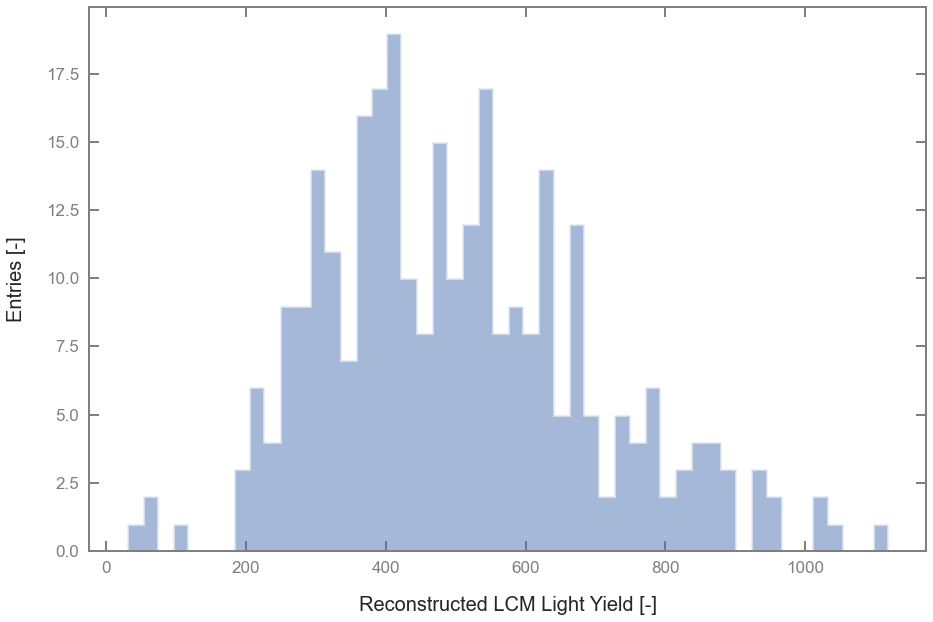

In [36]:
# LCM_lightYield
x_min  = np.min(LCM_lightYield)
x_max  = np.max(LCM_lightYield)
n_bins = 50
axis_labels = ['Reconstructed LCM Light Yield [-]','Entries [-]']
save_name = 'plots/'+str(plot_folder)+'/'+'h1_LCM_lightYield.png'
plot_h1(LCM_lightYield,x_min,x_max,n_bins,axis_labels,save_name)

Done.


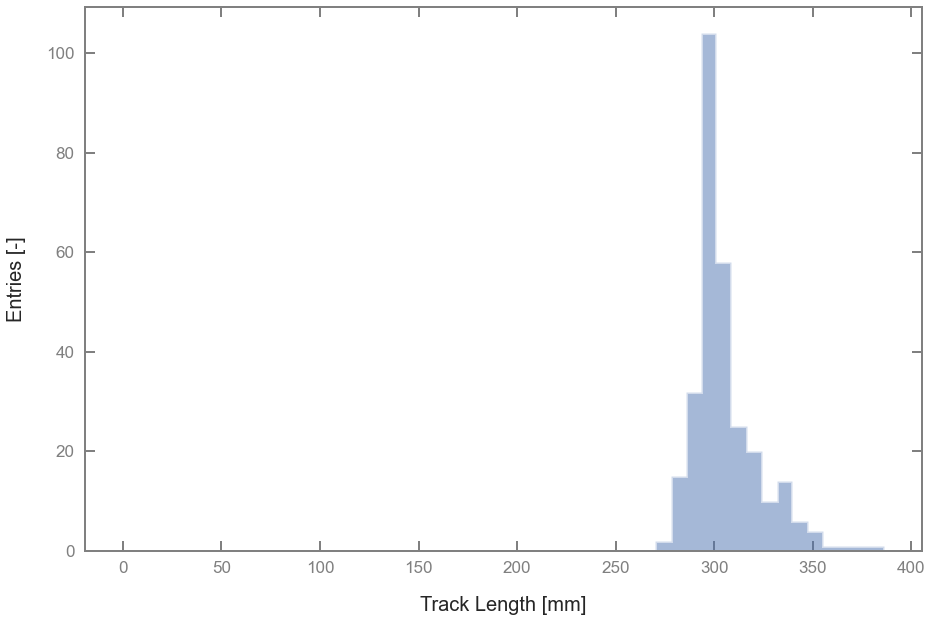

In [37]:
# Track Length
x_min  = 0
x_max  = np.max(track_length)
n_bins = 50
axis_labels = ['Track Length [mm]','Entries [-]']
save_name = 'plots/'+str(plot_folder)+'/'+'h1_track_lengths.png'
plot_h1(track_length,x_min,x_max,n_bins,axis_labels,save_name)

Done.


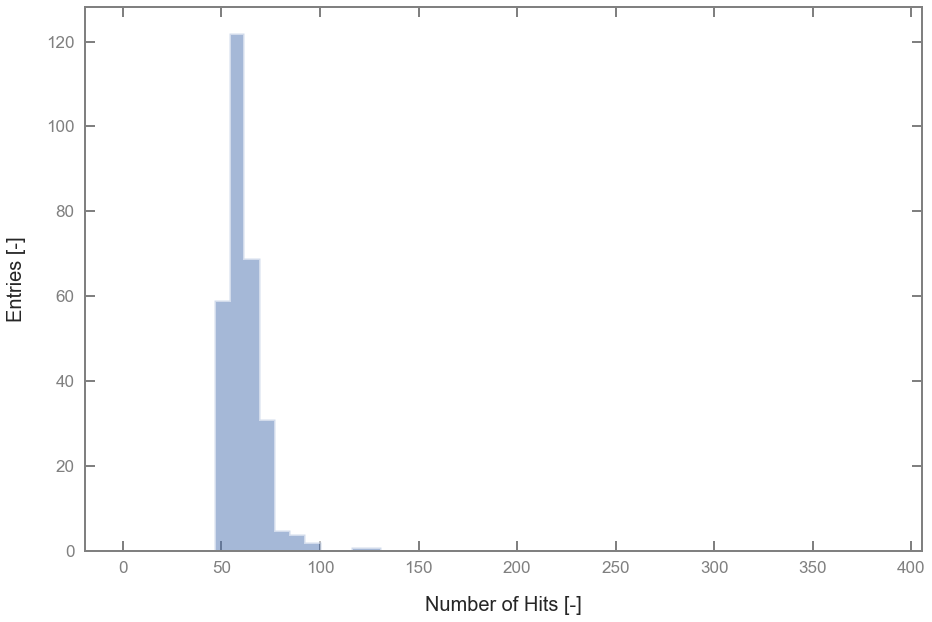

In [38]:
# Track n_hits
x_min  = 0
x_max  = np.max(track_length)
n_bins = 50
axis_labels = ['Number of Hits [-]','Entries [-]']
save_name = 'plots/'+str(plot_folder)+'/'+'h1_track_nhits.png'
plot_h1(track_n_hits,x_min,x_max,n_bins,axis_labels,save_name)

Done.


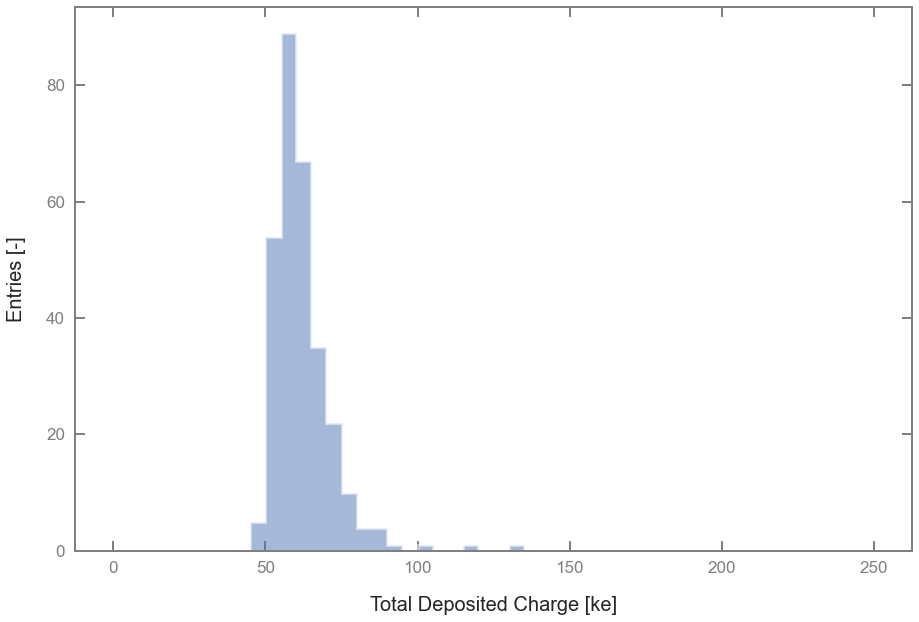

In [39]:
# Track q_tot
x_min  = 0
x_max  = 250 #np.max(track_q_tot)
n_bins = 50
axis_labels = ['Total Deposited Charge [ke]','Entries [-]']
save_name = 'plots/'+str(plot_folder)+'/'+'h1_track_qtot.png'
plot_h1(track_n_hits,x_min,x_max,n_bins,axis_labels,save_name)

/home/roman/software/anaconda3/envs/larpix-analysis-38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/roman/software/anaconda3/envs/larpix-analysis-38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


Done.


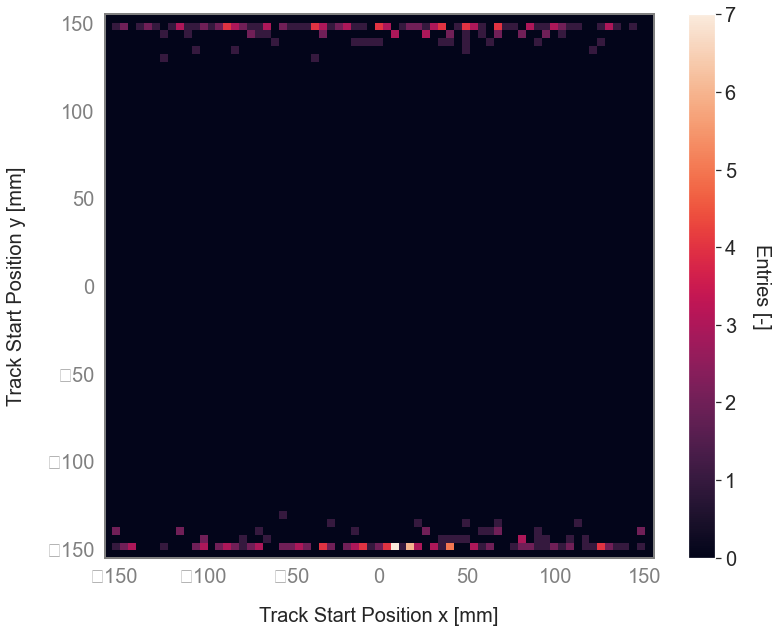

In [40]:
# start_pos_y vs. start_pos_x
x_min    = pixels_x_min # np.min(track_start_pos_x)
x_max    = pixels_x_max # np.max(track_start_pos_x)
y_min    = pixels_y_min # np.min(track_start_pos_y)
y_max    = pixels_y_max # np.max(track_start_pos_y)
n_bins_x = n_pixels_x
n_bins_y = n_pixels_y
x_bins = np.linspace(x_min,x_max,n_bins_x)
y_bins = np.linspace(y_min,y_max,n_bins_y)
#x_bins = np.arange(x_min,x_max+1,step=1.)
#y_bins = np.arange(y_min,y_max+1,step=1.)
axis_labels = ['Track Start Position x [mm]','Track Start Position y [mm]','Entries [-]']
save_name = 'plots/'+str(plot_folder)+'/'+'h2_track_startPos.png'
plot_h2([track_start_pos_x,track_start_pos_y],x_bins,y_bins,axis_labels,save_name)

Done.


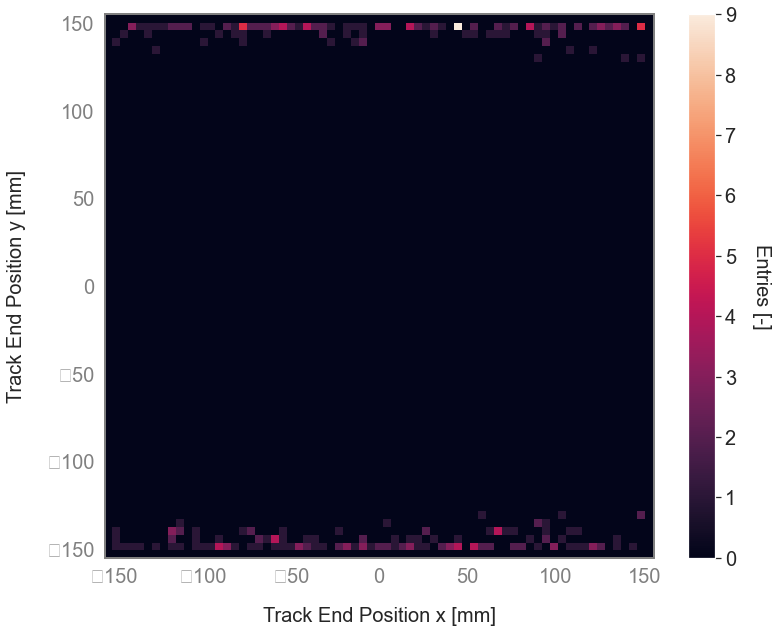

In [41]:
# end_pos_y vs. end_pos_x
x_min    = pixels_x_min # np.min(track_start_pos_x)
x_max    = pixels_x_max # np.max(track_start_pos_x)
y_min    = pixels_y_min # np.min(track_start_pos_y)
y_max    = pixels_y_max # np.max(track_start_pos_y)
n_bins_x = n_pixels_x
n_bins_y = n_pixels_y
x_bins = np.linspace(x_min,x_max,n_bins_x)
y_bins = np.linspace(y_min,y_max,n_bins_y)
#x_bins = np.arange(x_min,x_max+1,step=1.)
#y_bins = np.arange(y_min,y_max+1,step=1.)
axis_labels = ['Track End Position x [mm]','Track End Position y [mm]','Entries [-]']
save_name = 'plots/'+str(plot_folder)+'/'+'h2_track_endPos.png'
plot_h2([track_end_pos_x,track_end_pos_y],x_bins,y_bins,axis_labels,save_name)

Done.


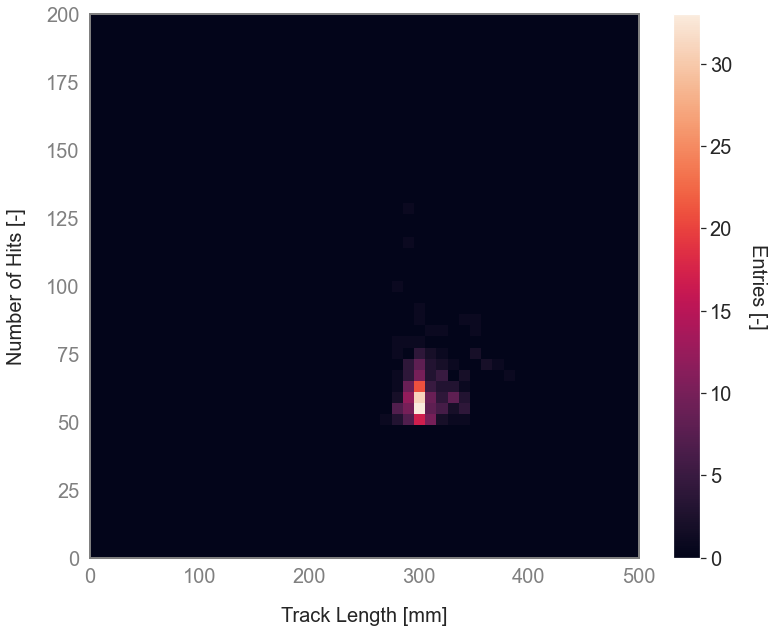

In [42]:
# NHits vs. TrackLength
x_min    = 0
x_max    = 500
y_min    = 0
y_max    = 200
n_bins_x = 50
n_bins_y = 50
x_bins = np.linspace(x_min,x_max,n_bins_x)
y_bins = np.linspace(y_min,y_max,n_bins_y)
#x_bins = np.arange(x_min,x_max+1,step=1.)
#y_bins = np.arange(y_min,y_max+1,step=1.)
axis_labels = ['Track Length [mm]','Number of Hits [-]','Entries [-]']
save_name = 'plots/'+str(plot_folder)+'/'+'h2_trackLength_vs_trackNHits.png'
plot_h2([track_length,track_n_hits],x_bins,y_bins,axis_labels,save_name)

In [43]:
# 3D plot of gravicentre

# TO BE DONE!!!

Done.


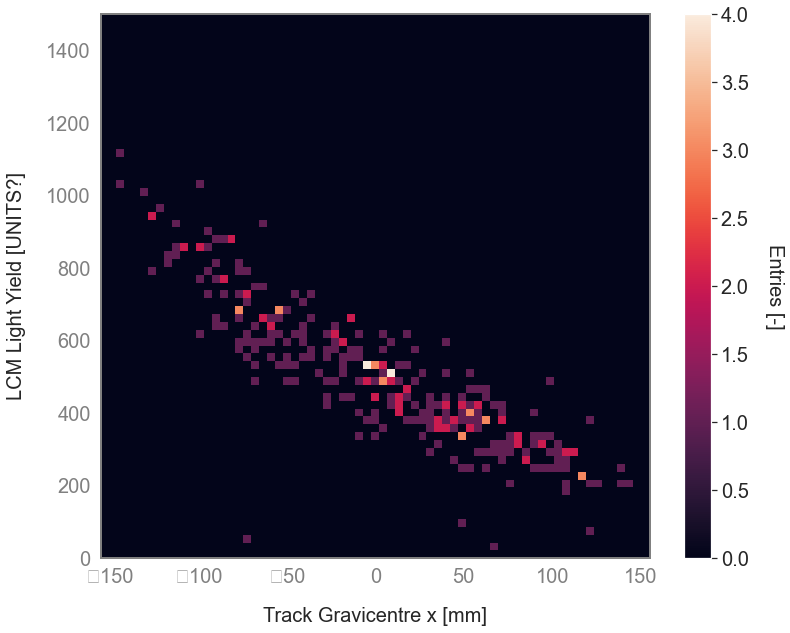

In [44]:
# LCM light-yield vs. track gravicentre_x
x_min    = pixels_x_min
x_max    = pixels_x_max
y_min    = 0 # np.min(LCM_lightYield)
y_max    = 1500 # np.max(LCM_lightYield)
n_bins_x = n_pixels_x
n_bins_y = n_pixels_y
x_bins = np.linspace(x_min,x_max,n_bins_x)
y_bins = np.linspace(y_min,y_max,n_bins_y)
axis_labels = ['Track Gravicentre x [mm]','LCM Light Yield [UNITS?]','Entries [-]']
save_name = 'plots/'+str(plot_folder)+'/'+'h2_LCM_lightYield_vs_trackGC.png'
plot_h2([track_cgx,LCM_lightYield],x_bins,y_bins,axis_labels,save_name)

In [45]:
# TODO: MAKE PROFILE PLOT OF LCM_LIGHTYIELD VS. GRAVICENTRE_X

#### Event Display

In [47]:
from plot_functions import *
os.system('rm -rf plots/' + str(plot_folder) +'/eventDisplays')
os.system('mkdir plots/' + str(plot_folder) +'/eventDisplays')

counter = 0
for track_id in range(n_tracks):
    input_tree.GetEntry(track_id)
    
    if input_tree.t_trackID not in selected_trackIDs:
        continue
        
    '''
    # For events with low light yield
    if input_tree.t_trackID not in low_light_events:
        continue
    print(input_tree.l_tlcm1_tot)
    '''
    
    hits_x = []
    hits_y = []
    hits_z = []
    hits_q = []

    '''    
    print(' ----------------------------------------- ')
    print(' t_eventID:        ', input_tree.t_eventID)
    print(' t_trackID:        ', input_tree.t_trackID)
    print(' t_event_q:        ', input_tree.t_event_q)
    print(' t_track_q:        ', input_tree.t_track_q)
    print(' t_event_nhits:    ', input_tree.t_event_nhits)
    print(' t_track_start:    [%.2f , %.2f , %.2f]' %(input_tree.t_track_start_pos_x,input_tree.t_track_start_pos_y,input_tree.t_track_start_pos_z))
    print(' t_track_end:      [%.2f , %.2f , %.2f]' %(input_tree.t_track_end_pos_x,input_tree.t_track_end_pos_y,input_tree.t_track_end_pos_z))
    print(' max(start_y):     ', max(input_tree.t_track_start_pos_y,input_tree.t_track_end_pos_y))
    print(' min(start_y):     ', min(input_tree.t_track_start_pos_y,input_tree.t_track_end_pos_y))
    print(' t_track_nhits:    ', input_tree.t_track_nhits)
    print(' t_track_res_x:    ', input_tree.t_track_residual_x)
    print(' t_track_res_y:    ', input_tree.t_track_residual_y)
    print(' t_track_res_z:    ', input_tree.t_track_residual_z)
    print(' sqrt(res_sum2):   ', np.sqrt(input_tree.t_track_residual_x**2 + input_tree.t_track_residual_y**2 + input_tree.t_track_residual_z**2  ))
    
    #print(' l_LCM_tot :      ', input_tree.l_tlcm1_tot)
    '''
    
    # Loop over all hits
    for hit in range(input_tree.t_track_nhits):
        hits_x.append(input_tree.t_track_hits_x[hit])
        hits_y.append(input_tree.t_track_hits_y[hit])
        hits_z.append(input_tree.t_track_hits_z[hit])
        hits_q.append(input_tree.t_track_hits_q[hit])
    
    
    # Plot 2D projection (onto xy pixel tile)
    x_min    = pixels_x_min
    x_max    = pixels_x_max
    y_min    = pixels_y_min
    y_max    = pixels_y_max
    n_bins_x = n_pixels_x
    n_bins_y = n_pixels_y
    x_bins = np.linspace(x_min,x_max,n_bins_x)
    y_bins = np.linspace(y_min,y_max,n_bins_y)
    save_name = 'plots/'+str(plot_folder)+'/eventDisplays/trackID_'+str(input_tree.t_trackID)+'_2D.png'
    plot_event_2D([hits_x,hits_y,hits_q],x_bins,y_bins,['Coordinate x [mm]','Coordinate y [mm]','Charge Deposition [ke]'],save_name)
    
    
    # Plot 3D event display
    x_min    = pixels_x_min
    x_max    = pixels_x_max
    y_min    = pixels_y_min
    y_max    = pixels_y_max
    z_min    = 0
    z_max    = max(pixels_z_max,np.max(hits_z))
    n_bins_x = n_pixels_x
    n_bins_y = n_pixels_y
    n_bins_z = n_pixels_z
    x_bins = np.linspace(x_min,x_max,n_bins_x)
    y_bins = np.linspace(y_min,y_max,n_bins_y)
    z_bins = np.linspace(z_min,z_max,n_bins_z)
    save_name = 'plots/'+str(plot_folder)+'/eventDisplays/trackID_'+str(input_tree.t_trackID)+'_3D.png'
    plot_event_3D([hits_x,hits_y,hits_z,hits_q],x_bins,y_bins,z_bins,['Coordinate x [mm]','Coordinate y [mm]','Coordinate z [mm]','Charge Deposition [ke]'],save_name)
    '''
    # OLD VERSION
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim((pixels_x_min,pixels_x_max))
    ax.set_ylim((pixels_y_min,pixels_y_max))
    ax.set_zlim((0.,max(3200,np.max(hits_z))))
    img = ax.scatter(hits_x,hits_y,hits_z,c=hits_q,cmap=plt.hot())
    fig.colorbar(img)
    plt.show()
    save_name = 'evDisplay_3D.png'
    plt.savefig(save_name, dpi=400)
    plt.close()
    '''
    counter += 1

    if counter%20==0:
        print(' Processed', counter, 'of', len(selected_trackIDs), 'selected tracks...')
    
print('Done.')

30.290021896362305
73.20654296875
96.81409454345703
54.196651458740234
Done.
